# loading, handling and plotting financial data with packages like:
### - 1. `xts` for creating time series object and handling time series data
### - 2. `quantmod` for pulling online and offline financial data and plotting
### - 3. `ggplot2` Grammer of graphics for ploting

### Installing packages `install.packages(c("xts", "quantmod", "ggplot2"))`


### -1 `xts`

In [1]:
# loading xts package
library(xts)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [2]:
# Eploring xts with sample_matrix data that comes with the package
# load data
data(sample_matrix)

In [3]:
# checking the head of the data
head(sample_matrix)

,Open,High,Low,Close
2007-01-02,50.03978,50.11778,49.95041,50.11778
2007-01-03,50.23050,50.42188,50.23050,50.39767
2007-01-04,50.42096,50.42096,50.26414,50.33236
2007-01-05,50.37347,50.37347,50.22103,50.33459
2007-01-06,50.24433,50.24433,50.11121,50.18112
2007-01-07,50.13211,50.21561,49.99185,49.99185


In [4]:
# checking the object type of sameple_matrix
class(sample_matrix)

[1] "matrix" "array"

In [5]:
# Getting detail info on the matrix object
str(sample_matrix)

 num [1:180, 1:4] 50 50.2 50.4 50.4 50.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:180] "2007-01-02" "2007-01-03" "2007-01-04" "2007-01-05" ...
  ..$ : chr [1:4] "Open" "High" "Low" "Close"


In [6]:
# converting sample_matrix data from a matrix.array object to xts.zoo object
xts_data <- as.xts(sample_matrix, descr = "sample_matrix converted to xts.zoo object")

In [7]:
# Rechecking the structure on the new xts object makes the info somewhat more readable
str(xts_data)

An xts object on 2007-01-02 / 2007-06-30 containing: 
  Data:    double [180, 4]
  Columns: Open, High, Low, Close
  Index:   POSIXct,POSIXt [180] (TZ: "")
  xts Attributes:
    $ descr: chr "sample_matrix converted to xts.zoo object"


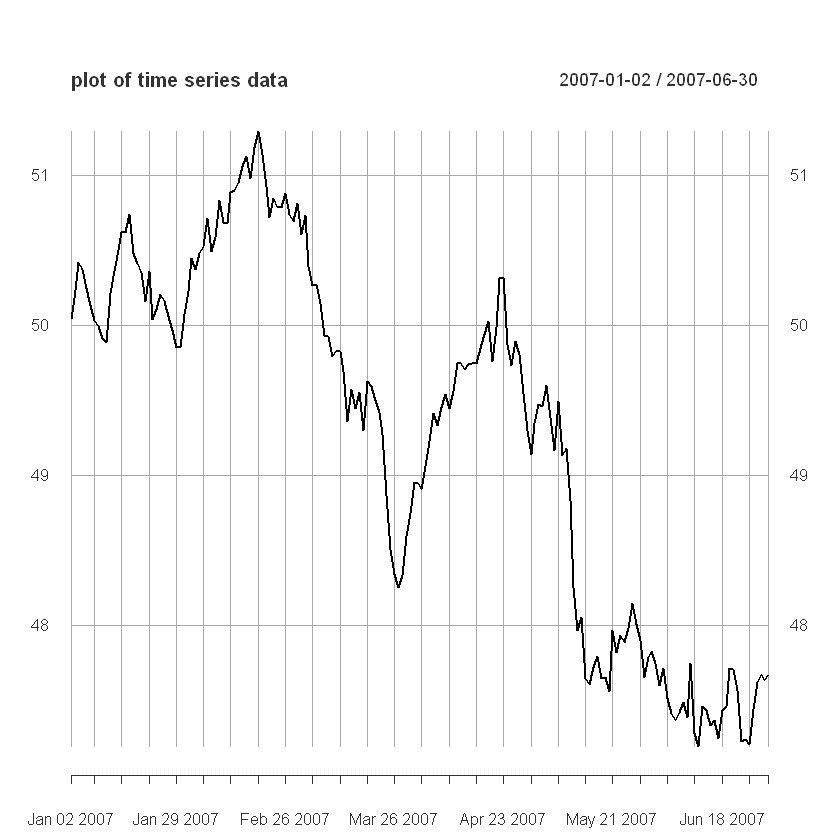

In [8]:
# plotting one column of the data
plot(xts_data[,1], main = "plot of time series data", cex.main = 0.8)

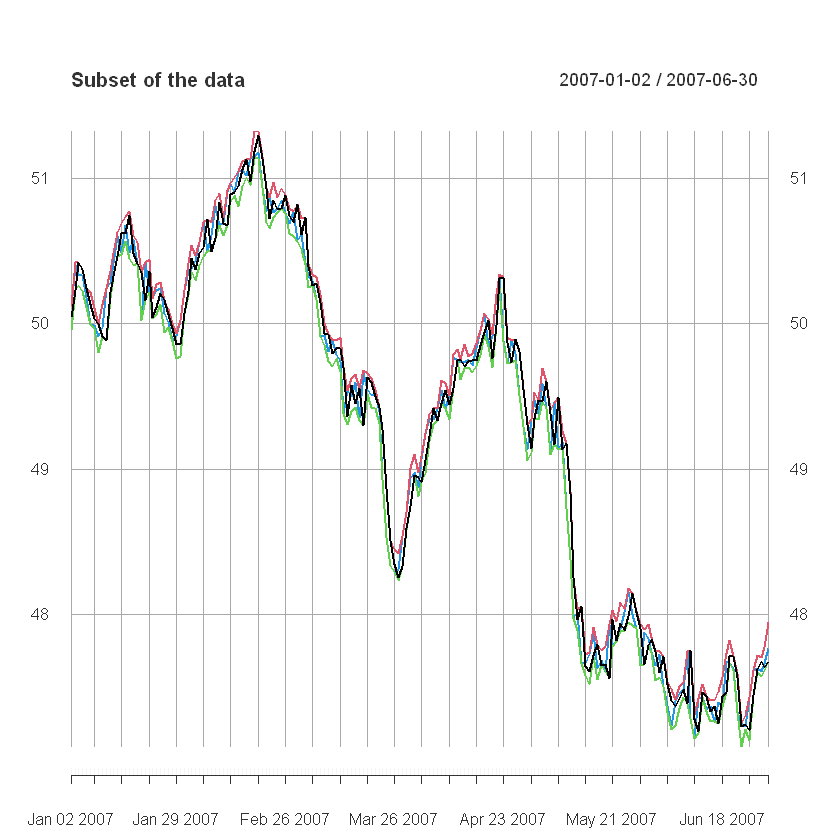

In [9]:
# subsetting only some rows to plot
plot(xts_data["2007-01-01::2020-02:12"], main = "Subset of the data", cex.main = 0.8)


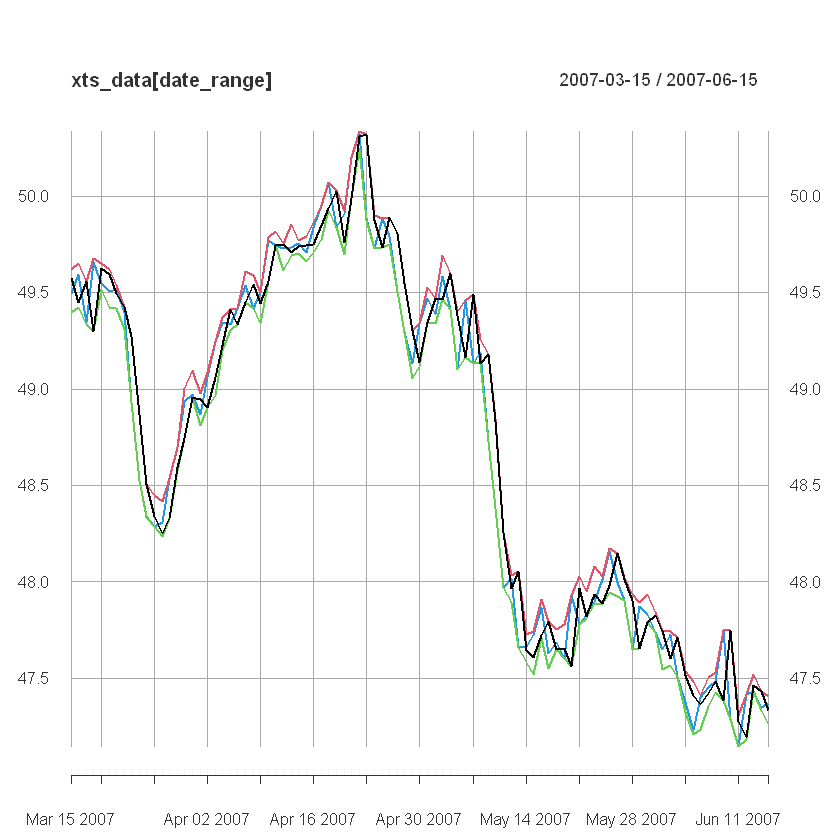

In [10]:
# other ways to provide the subset
date_range <- "2007-03-15::2007-06-15"
plot(xts_data[date_range])

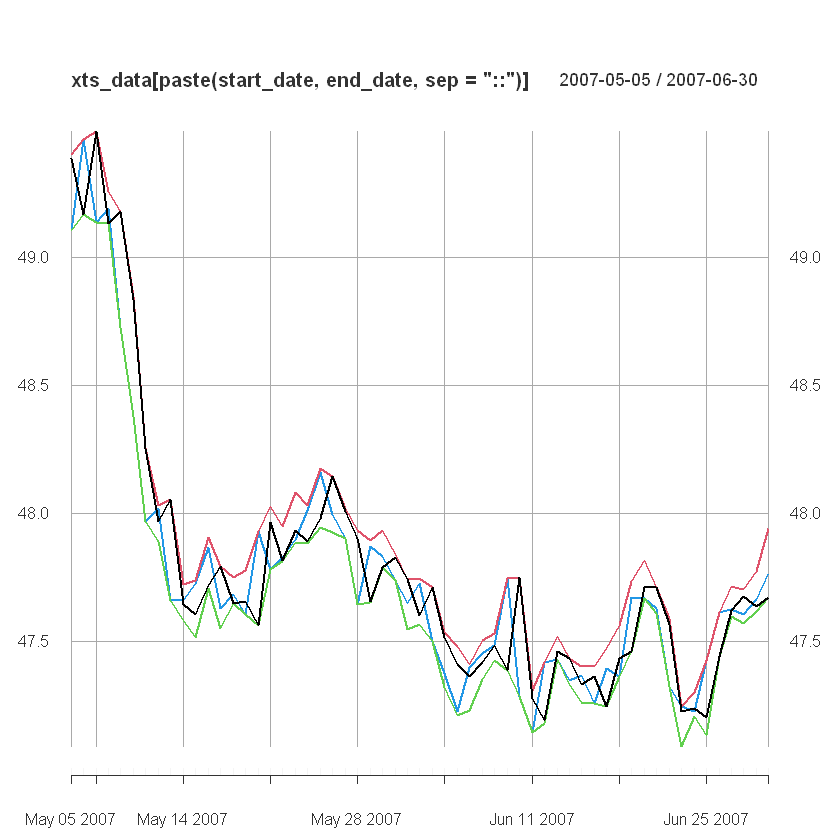

In [11]:
# using paste to combine date ranges for the plot
start_date <- "2007-05-05"
end_date <- "2007-12-31"
plot(xts_data[paste(start_date, end_date, sep = "::")])

In [12]:
# creating sample time series data to explore xts time series capapilities
price_vector <- c(101.02, 101.03, 101.03, 101.04, 101.05,
                  101.03, 101.02, 101.01, 101.00, 100.99)

dates <- c("03/12/2013 08:00:00.532123",
           "03/12/2013 08:00:01.982333",
           "03/12/2013 08:00:01.650321",
           "03/12/2013 08:00:02.402321",
           "03/12/2013 08:00:02.540432",
           "03/12/2013 08:00:03.004554",
           "03/12/2013 08:00:03.900213",
           "03/12/2013 08:00:04.050323",
           "03/12/2013 08:00:04.430345",
           "03/12/2013 08:00:05.700123")

In [13]:
options(digits.sec = 6)

In [14]:
# creating time index in a correct format
time_index <- strptime(dates, format = "%d/%m/%Y %H:%M:%OS")

In [15]:
# create xts object with price_vector and time_index
xts_price_vector <- xts(price_vector, time_index)

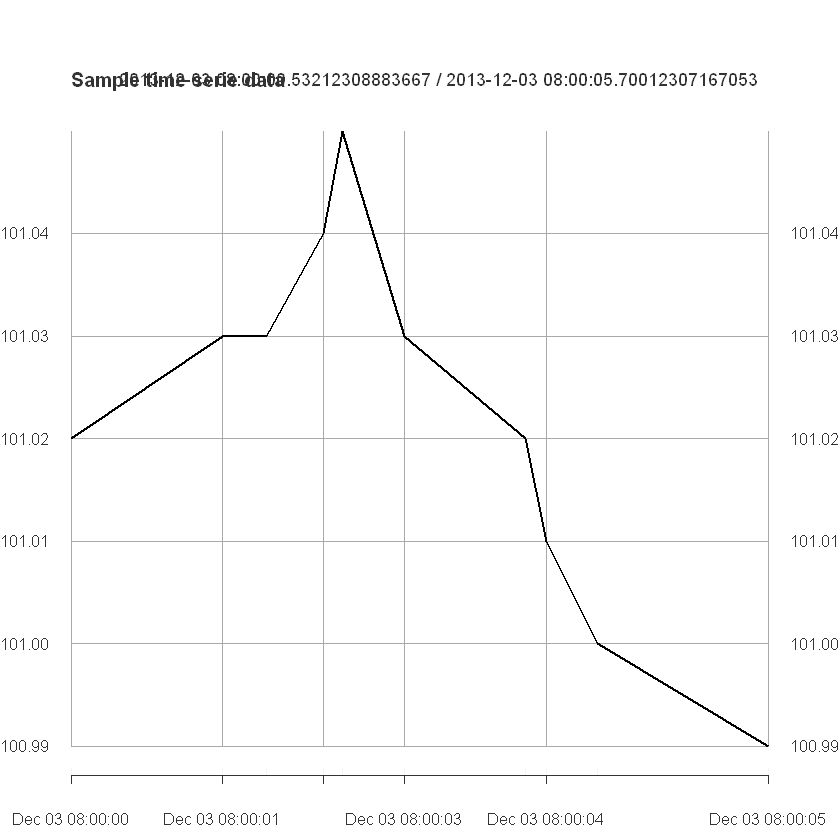

In [16]:
# plot the Xts_price_vector
plot(xts_price_vector, main = "Sample time serie data")

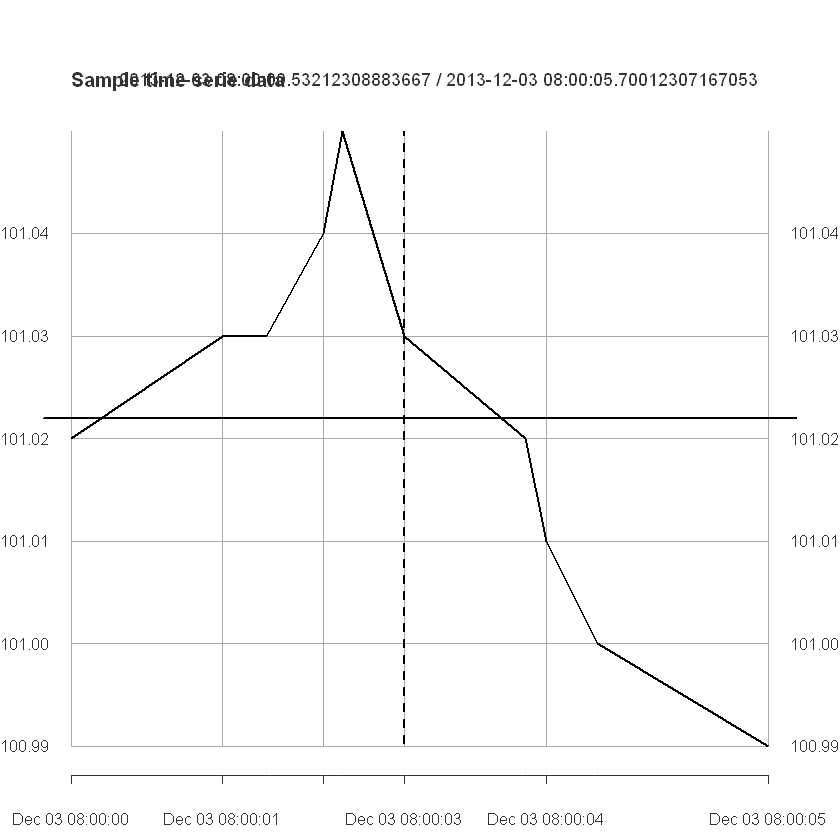

In [17]:
# plot the Xts_price_vector
plot(xts_price_vector, main = "Sample time serie data")

# adding a horizontal line on the mean
abline(h = mean(xts_price_vector), lwd = 2)
grid(lty = 0)


# adding a vertical line at a specified time stamp
my_time <- as.POSIXct("03/12/2013 08:00:03.004554", format = "%d/%m/%Y %H:%M:%OS")
abline(v = my_time, lwd = 2, lty = 2)

# - 2. `quantmod`

In [18]:
# load quantmod package
library(quantmod)

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [19]:
# start by downloading a AAPL stock online for exploration
AAPL <- getSymbols("AAPL", auto.assign = FALSE)

In [20]:
## checking the class of AAPL
class(AAPL)

[1] "xts" "zoo"

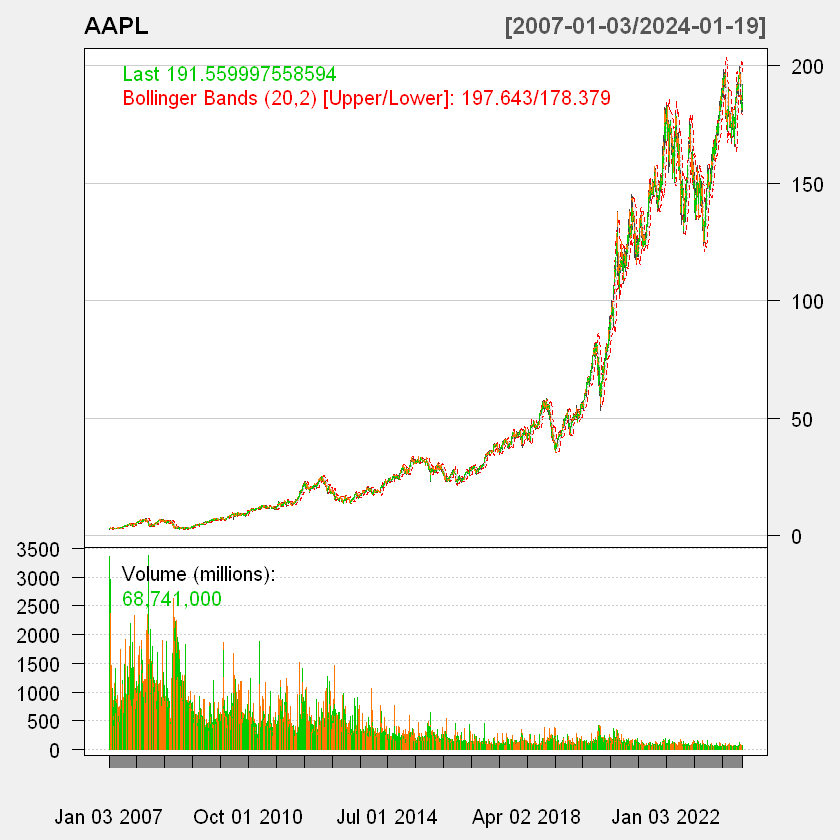

In [21]:
# charting with quantmod and adding some technical indicators
chartSeries(AAPL, theme = chartTheme("white"), TA = "addVo(); addBBands()")

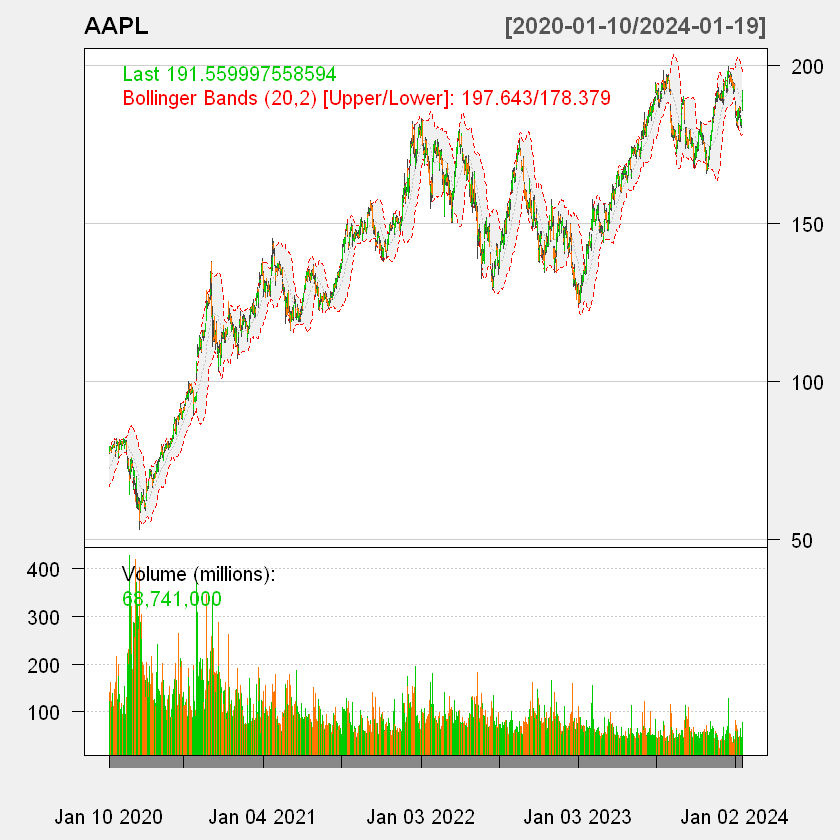

In [22]:
# updating the chart with new data without re-specifying all chart parameters
reChart(subset = "2020-01-10::2024-01-19")

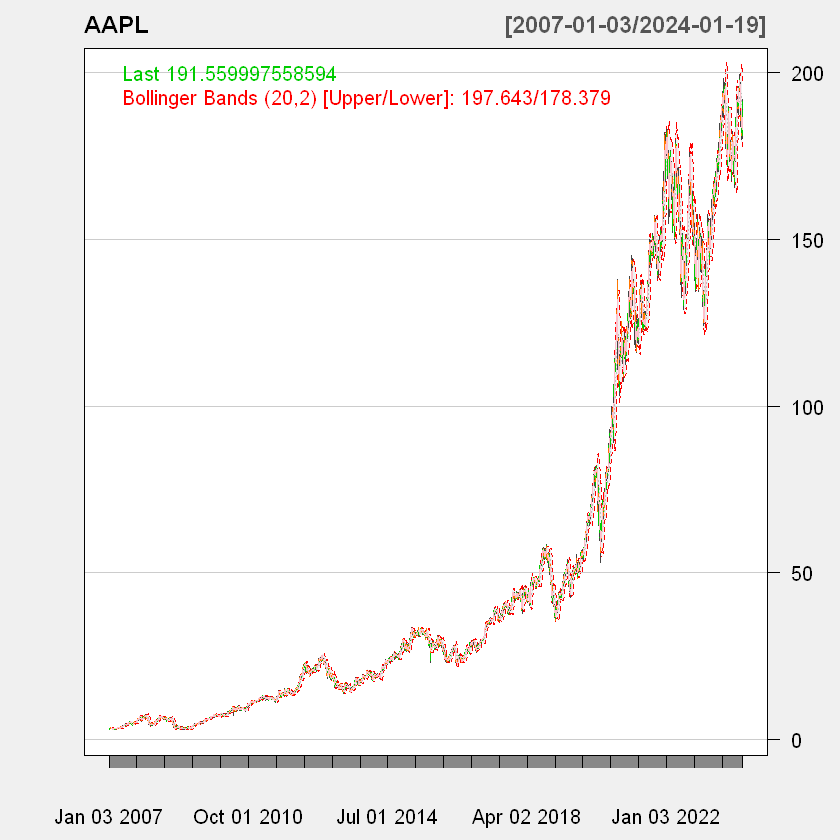

In [23]:
# adding other technical indicators
chartSeries(AAPL, theme = chartTheme("white"), TA = "addBBands(); addDEMA()")

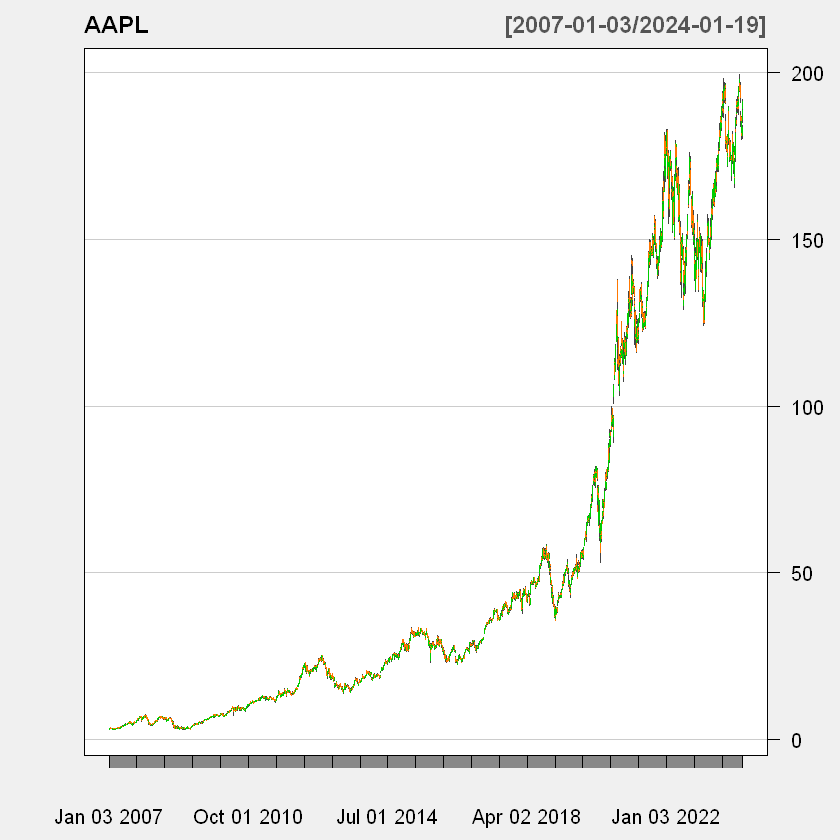

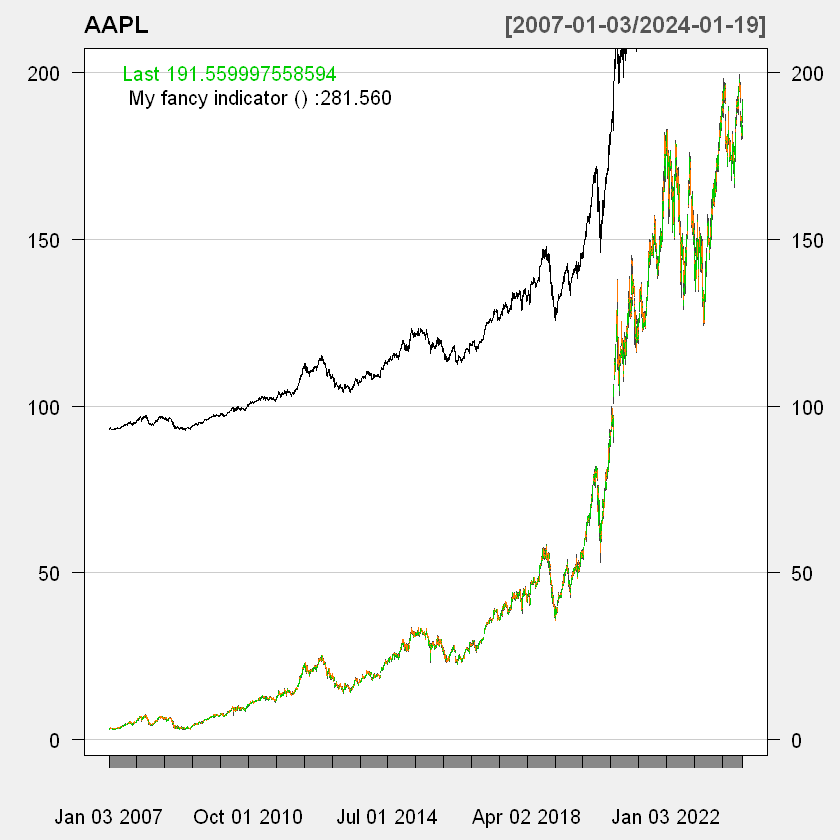

In [24]:
# creating one own indicator

# start by charting with no indicator
chartSeries(AAPL, theme = chartTheme("white"), TA = NULL)

# creating indicator function
my_indicator <- function(x) {
  return(x + 90)
}

add_my_indicator <- newTA(FUN = my_indicator, preFUN = Cl, on = 1, legend.name = "My fancy indicator")


# re-plotting with the customized indicator
add_my_indicator()


# - 3. `ggplot2`

In [25]:
# load ggplot2 package
library(ggplot2)

In [26]:
# start by creating a dataframe from AAPL xts object
df <- AAPL[, c("AAPL.Adjusted", "AAPL.Volume")]

In [27]:
# rename the columns
names(df) <- c("price", "volume")
head(df)

              price     volume
2007-01-03 2.536984 1238319600
2007-01-04 2.593295  847260400
2007-01-05 2.574827  834741600
2007-01-08 2.587543  797106800
2007-01-09 2.802490 3349298400
2007-01-10 2.936605 2952880000

In [28]:
# creating a new column the hold the log returns of price
df$returns <- diff(log(df[,1]))
head(df)

              price     volume      returns
2007-01-03 2.536984 1238319600           NA
2007-01-04 2.593295  847260400  0.021953251
2007-01-05 2.574827  834741600 -0.007146883
2007-01-08 2.587543  797106800  0.004926266
2007-01-09 2.802490 3349298400  0.079799447
2007-01-10 2.936605 2952880000  0.046746170

In [29]:
# removing the first NA values in the returns column
df <- df[-1, ]
head(df)

              price     volume      returns
2007-01-04 2.593295  847260400  0.021953251
2007-01-05 2.574827  834741600 -0.007146883
2007-01-08 2.587543  797106800  0.004926266
2007-01-09 2.802490 3349298400  0.079799447
2007-01-10 2.936605 2952880000  0.046746170
2007-01-11 2.900276 1440252800 -0.012448420

In [30]:
# segmenting the returns in to bins
df$cuts <- cut(abs(df$returns), breaks = c(0, 0.02, 0.04, 0.25), include.lowest = TRUE)

In [31]:
# creating mean columns
df$mean <- NA

for (i in 1:3) {
  group <- which(df$cuts == i)
  if (length(group) > 0){
    df$mean[group] <- mean(df$volume[group])
  }
}
head(df)

              price     volume      returns cuts      mean
2007-01-04 2.593295  847260400  0.021953251    2 481507204
2007-01-05 2.574827  834741600 -0.007146883    1 293588244
2007-01-08 2.587543  797106800  0.004926266    1 293588244
2007-01-09 2.802490 3349298400  0.079799447    3 876675814
2007-01-10 2.936605 2952880000  0.046746170    3 876675814
2007-01-11 2.900276 1440252800 -0.012448420    1 293588244

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


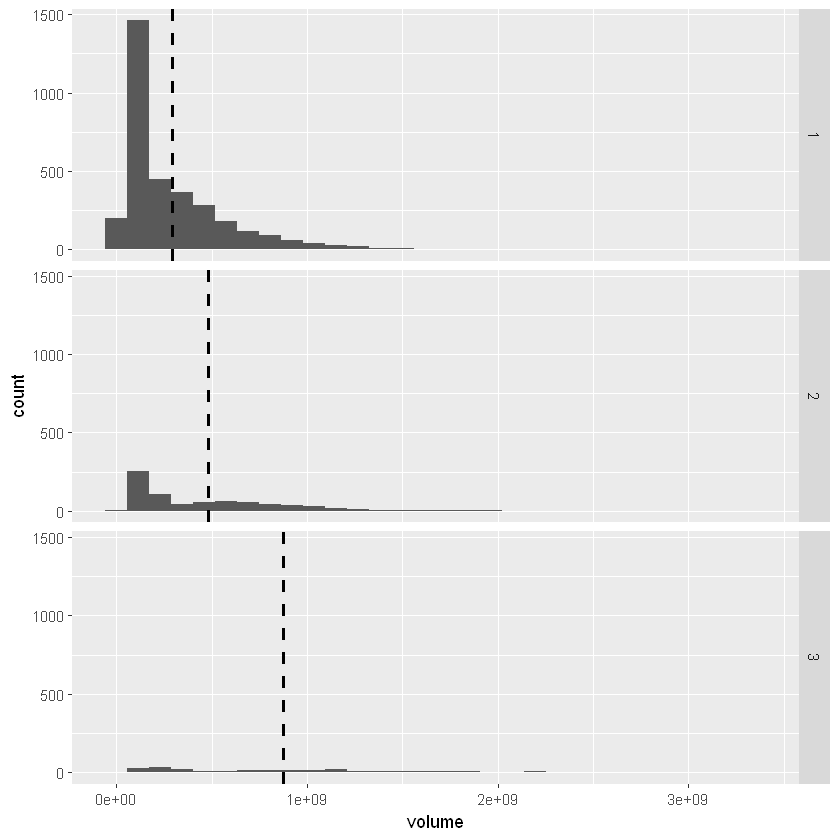

In [32]:
# plotting result
ggplot(df) + geom_histogram(aes(x=volume)) + facet_grid(cuts ~ .) + geom_vline(aes(xintercept=mean), linetype = "dashed", size=1)